In [59]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [60]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [61]:
NUM_CLASSES = 6

# Dataset reading

In [62]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42 * 3) + 1)))

In [63]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42 * 3, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [66]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 126)               0         
                                                                 
 dense_12 (Dense)            (None, 20)                2540      
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 6)                 66        
                                                                 
Total params: 2,816
Trainable params: 2,816
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [68]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [69]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8403 - accuracy: 0.1719
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 1s 207ms/step - loss: 1.8147 - accuracy: 0.1792 - val_loss: 1.7684 - val_accuracy: 0.1250
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7782 - accuracy: 0.1953
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.7732 - accuracy: 0.2125 - val_loss: 1.7290 - val_accuracy: 0.3000
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7500 - accuracy: 0.2422
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.7511 - accuracy: 0.2375 - val_loss: 1.6916 - val_accuracy: 0.3000
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6843 - accuracy: 0.2891
Epoch 4: sa

2/2 [==============================] - 0s 49ms/step - loss: 1.3967 - accuracy: 0.3458 - val_loss: 1.4004 - val_accuracy: 0.3375
Epoch 29/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3594 - accuracy: 0.3828
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.3851 - accuracy: 0.3833 - val_loss: 1.3941 - val_accuracy: 0.3375
Epoch 30/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3615 - accuracy: 0.3984
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 1.3539 - accuracy: 0.4042 - val_loss: 1.3880 - val_accuracy: 0.3375
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3745 - accuracy: 0.3906
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 1.3667 - accuracy: 0.3708 - val_loss: 1.

Epoch 56/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2357 - accuracy: 0.4062
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.2326 - accuracy: 0.3750 - val_loss: 1.2161 - val_accuracy: 0.3375
Epoch 57/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1766 - accuracy: 0.4688
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.1931 - accuracy: 0.4458 - val_loss: 1.2100 - val_accuracy: 0.3375
Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2526 - accuracy: 0.3125
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 1.2417 - accuracy: 0.3333 - val_loss: 1.2039 - val_accuracy: 0.3375
Epoch 59/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2081 - accuracy: 0.3750
Epoch

1/2 [==============>...............] - ETA: 0s - loss: 1.1509 - accuracy: 0.3828
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 1.1267 - accuracy: 0.4208 - val_loss: 1.0780 - val_accuracy: 0.3375
Epoch 84/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1259 - accuracy: 0.3672
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.1207 - accuracy: 0.3875 - val_loss: 1.0765 - val_accuracy: 0.3375
Epoch 85/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1083 - accuracy: 0.4531
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.1009 - accuracy: 0.4625 - val_loss: 1.0754 - val_accuracy: 0.3625
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1430 - accuracy: 0.3516
Epoch 86: saving mo

1/2 [==============>...............] - ETA: 0s - loss: 1.0922 - accuracy: 0.4453
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.0995 - accuracy: 0.4292 - val_loss: 1.0369 - val_accuracy: 0.5250
Epoch 111/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0588 - accuracy: 0.4688
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 1.0801 - accuracy: 0.4417 - val_loss: 1.0369 - val_accuracy: 0.5125
Epoch 112/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0910 - accuracy: 0.4453
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 1.0759 - accuracy: 0.4458 - val_loss: 1.0369 - val_accuracy: 0.5125
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0778 - accuracy: 0.4766
Epoch 113: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.0630 - accuracy: 0.4844
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.0521 - accuracy: 0.4833 - val_loss: 1.0005 - val_accuracy: 0.6125
Epoch 138/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0580 - accuracy: 0.5000
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 1.0556 - accuracy: 0.4833 - val_loss: 0.9992 - val_accuracy: 0.6125
Epoch 139/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0681 - accuracy: 0.4297
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.0587 - accuracy: 0.4542 - val_loss: 0.9979 - val_accuracy: 0.6000
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0126 - accuracy: 0.5000
Epoch 140: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9848 - accuracy: 0.5469
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.0096 - accuracy: 0.4958 - val_loss: 0.9529 - val_accuracy: 0.6375
Epoch 165/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9742 - accuracy: 0.5547
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 1.0060 - accuracy: 0.4875 - val_loss: 0.9501 - val_accuracy: 0.6375
Epoch 166/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0032 - accuracy: 0.4766
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 1.0135 - accuracy: 0.4792 - val_loss: 0.9469 - val_accuracy: 0.6500
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0042 - accuracy: 0.4844
Epoch 167: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9848 - accuracy: 0.4609
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 0.9706 - accuracy: 0.5208 - val_loss: 0.8980 - val_accuracy: 0.6375
Epoch 192/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9766 - accuracy: 0.5000
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 0.9867 - accuracy: 0.4667 - val_loss: 0.8961 - val_accuracy: 0.6500
Epoch 193/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9571 - accuracy: 0.4688
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.9546 - accuracy: 0.5042 - val_loss: 0.8947 - val_accuracy: 0.6375
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9080 - accuracy: 0.6172
Epoch 194: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8528 - accuracy: 0.6250
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.8607 - accuracy: 0.5958 - val_loss: 0.8466 - val_accuracy: 0.6500
Epoch 219/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9292 - accuracy: 0.5156
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.9352 - accuracy: 0.5042 - val_loss: 0.8442 - val_accuracy: 0.6500
Epoch 220/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9451 - accuracy: 0.5156
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.9118 - accuracy: 0.5458 - val_loss: 0.8424 - val_accuracy: 0.6500
Epoch 221/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9915 - accuracy: 0.5000
Epoch 221: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8981 - accuracy: 0.5312
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.8922 - accuracy: 0.5667 - val_loss: 0.8183 - val_accuracy: 0.6500
Epoch 246/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9429 - accuracy: 0.5156
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.9084 - accuracy: 0.5542 - val_loss: 0.8160 - val_accuracy: 0.6500
Epoch 247/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9345 - accuracy: 0.5234
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.9076 - accuracy: 0.5542 - val_loss: 0.8137 - val_accuracy: 0.6500
Epoch 248/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8961 - accuracy: 0.5547
Epoch 248: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9052 - accuracy: 0.5859
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.8891 - accuracy: 0.5833 - val_loss: 0.7887 - val_accuracy: 0.6500
Epoch 273/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8661 - accuracy: 0.5547
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.8756 - accuracy: 0.5917 - val_loss: 0.7872 - val_accuracy: 0.6500
Epoch 274/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8971 - accuracy: 0.5781
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.9059 - accuracy: 0.5833 - val_loss: 0.7856 - val_accuracy: 0.6500
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8935 - accuracy: 0.5234
Epoch 275: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8156 - accuracy: 0.6250
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.8415 - accuracy: 0.5917 - val_loss: 0.7577 - val_accuracy: 0.6500
Epoch 300/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8645 - accuracy: 0.5781
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.8617 - accuracy: 0.5792 - val_loss: 0.7574 - val_accuracy: 0.6500
Epoch 301/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8476 - accuracy: 0.5547
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.8351 - accuracy: 0.5792 - val_loss: 0.7569 - val_accuracy: 0.6500
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8146 - accuracy: 0.6406
Epoch 302: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9111 - accuracy: 0.5703
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.8758 - accuracy: 0.5500 - val_loss: 0.7220 - val_accuracy: 0.6750
Epoch 327/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8290 - accuracy: 0.6094
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 0.8129 - accuracy: 0.6500 - val_loss: 0.7207 - val_accuracy: 0.6750
Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8227 - accuracy: 0.5703
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.8145 - accuracy: 0.6083 - val_loss: 0.7205 - val_accuracy: 0.6750
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8440 - accuracy: 0.6016
Epoch 329: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8625 - accuracy: 0.6094
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.7951 - accuracy: 0.6500 - val_loss: 0.6602 - val_accuracy: 0.6750
Epoch 354/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7820 - accuracy: 0.6484
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.7946 - accuracy: 0.6458 - val_loss: 0.6576 - val_accuracy: 0.6750
Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8057 - accuracy: 0.6172
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.8318 - accuracy: 0.6208 - val_loss: 0.6553 - val_accuracy: 0.6750
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7806 - accuracy: 0.6406
Epoch 356: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6964 - accuracy: 0.6875
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.7345 - accuracy: 0.6458 - val_loss: 0.6183 - val_accuracy: 0.7125
Epoch 381/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7666 - accuracy: 0.6484
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 45ms/step - loss: 0.7367 - accuracy: 0.6458 - val_loss: 0.6106 - val_accuracy: 0.7750
Epoch 382/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8003 - accuracy: 0.6016
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.7743 - accuracy: 0.6417 - val_loss: 0.6045 - val_accuracy: 0.8000
Epoch 383/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8127 - accuracy: 0.6172
Epoch 383: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7398 - accuracy: 0.6328
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 46ms/step - loss: 0.7404 - accuracy: 0.6458 - val_loss: 0.5474 - val_accuracy: 0.9375
Epoch 408/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7547 - accuracy: 0.6094
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.7903 - accuracy: 0.6125 - val_loss: 0.5450 - val_accuracy: 0.9375
Epoch 409/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6748 - accuracy: 0.6953
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.6874 - accuracy: 0.6875 - val_loss: 0.5431 - val_accuracy: 0.9375
Epoch 410/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6203 - accuracy: 0.7891
Epoch 410: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6549 - accuracy: 0.7188
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.7090 - accuracy: 0.6667 - val_loss: 0.5016 - val_accuracy: 0.9625
Epoch 435/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7477 - accuracy: 0.6250
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.7410 - accuracy: 0.6417 - val_loss: 0.5021 - val_accuracy: 0.9625
Epoch 436/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6763 - accuracy: 0.6719
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.7286 - accuracy: 0.6458 - val_loss: 0.5027 - val_accuracy: 0.9625
Epoch 437/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6520 - accuracy: 0.7109
Epoch 437: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7277 - accuracy: 0.6328
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.7247 - accuracy: 0.6458 - val_loss: 0.5022 - val_accuracy: 0.9625
Epoch 462/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6604 - accuracy: 0.6953
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.6579 - accuracy: 0.6958 - val_loss: 0.5011 - val_accuracy: 0.9625
Epoch 463/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7319 - accuracy: 0.6719
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 0.6949 - accuracy: 0.6833 - val_loss: 0.4995 - val_accuracy: 0.9625
Epoch 464/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6729 - accuracy: 0.7031
Epoch 464: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6881 - accuracy: 0.6797
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.6967 - accuracy: 0.6708 - val_loss: 0.4650 - val_accuracy: 0.9625
Epoch 489/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6391 - accuracy: 0.6953
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 0.6842 - accuracy: 0.6792 - val_loss: 0.4611 - val_accuracy: 0.9625
Epoch 490/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6734 - accuracy: 0.6641
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.7385 - accuracy: 0.6333 - val_loss: 0.4581 - val_accuracy: 0.9625
Epoch 491/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5573 - accuracy: 0.7578
Epoch 491: sa

In [70]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 18ms/step - loss: 0.4600 - accuracy: 0.9625


In [71]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [72]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 62ms/step
[1.0969564e-05 2.0261525e-01 8.3142550e-06 6.6409689e-01 3.7181344e-06
 1.3326478e-01]
3


# Confusion matrix

3/3 [==============================] - 0s 1ms/step


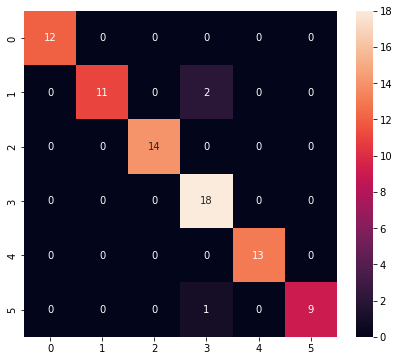

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00        14
           3       0.86      1.00      0.92        18
           4       1.00      1.00      1.00        13
           5       1.00      0.90      0.95        10

    accuracy                           0.96        80
   macro avg       0.98      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [74]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [75]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmp84vuqrwd\assets


INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmp84vuqrwd\assets


5888

# Inference test

In [76]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [77]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [78]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [79]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [80]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0973782e-05 2.0454803e-01 8.2301449e-06 6.5976781e-01 3.6861552e-06
 1.3566123e-01]
3
